# VCintModel

Machine information 

In [1]:
versioninfo()

Julia Version 1.2.0
Commit c6da87ff4b (2019-08-20 00:03 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.6.0)
  CPU: Intel(R) Core(TM) i5-6267U CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, skylake)


## Data

Suppose we have the following variables:

* `y`: $324$-by-$1$ vector of phenotype of interest 
* `X`: $324$-by-$1$ vector indicating sex of each individual 
* `G`: $150$-by-$1$ vector whose $i$-th element is a $324$-by-$q_i$ genotype matrix (matrix of minor allele counts) for gene $i,$ where $i=1,\ldots, 150$ and $q_i$ is the number of variants for gene $i$
* `trtvec`: $324$-by-$1$ vector indicating treatment status of each individual. 

These variables are saved in `.jld2` file. First, read in variables using `JLD2` package. 

In [2]:
using JLD2
@load "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/VarianceComponentSelect.jl/docs/SNPset_interaction.jld2" y y2 X G V trtvec

6-element Array{Symbol,1}:
 :y     
 :y2    
 :X     
 :G     
 :V     
 :trtvec

Our phenotype vector: 

In [3]:
y

324-element Array{Float64,1}:
 -0.40911273847444835 
 -0.0597995644528963  
  0.02798994878695149 
 -0.5810287222548617  
  0.4325440331155418  
  0.048256153207898195
 -0.27027696763685594 
  0.10490944338119751 
 -0.7799009563553139  
 -0.20593444247247622 
  0.5520065403740653  
 -0.10092686337307819 
  0.5983104367265357  
  ⋮                   
  0.03739468023738035 
  0.47352506877371714 
 -0.22836115042409924 
 -0.3876214190551975  
  0.10326243849550518 
 -0.4882830145406528  
 -0.06903684417417116 
  0.09798041795966334 
 -0.1480073641765541  
 -0.29900800903355274 
 -0.008878790322644575
 -0.09571535379121696 

Covariate matrix indicating sex:

In [4]:
X

324-element Array{Float64,1}:
 1.0
 2.0
 2.0
 1.0
 2.0
 1.0
 2.0
 2.0
 2.0
 1.0
 2.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 2.0
 2.0
 2.0
 1.0
 1.0
 2.0
 1.0
 1.0
 1.0
 2.0

Vector of genotype matrix for each gene: 

In [5]:
G

150-element Array{Array{Float64,2},1}:
 [2.0 0.0 … 2.0 2.0; 2.0 1.0 … 1.4485981308411215 2.0; … ; 2.0 0.0 … 1.0 2.0; 2.0 0.0 … 2.0 2.0]
 [2.0 2.0 … 2.0 2.0; 2.0 1.0 … 1.0 0.0; … ; 2.0 1.0 … 1.0 0.0; 2.0 2.0 … 1.0 2.0]               
 [2.0 2.0 … 0.0 2.0; 2.0 2.0 … 2.0 2.0; … ; 2.0 2.0 … 1.0 2.0; 2.0 2.0 … 0.0 1.0]               
 [2.0 1.0 … 0.0 2.0; 2.0 1.0 … 0.0 2.0; … ; 2.0 0.0 … 1.0 2.0; 1.0 1.0 … 1.0 2.0]               
 [1.0 2.0 … 0.0 2.0; 1.0 2.0 … 1.0 2.0; … ; 0.0 2.0 … 1.0 2.0; 2.0 2.0 … 0.0 2.0]               
 [2.0 2.0 … 1.0 2.0; 2.0 2.0 … 1.0 2.0; … ; 2.0 2.0 … 1.0 2.0; 2.0 2.0 … 1.0 2.0]               
 [2.0 1.0 … 1.0 2.0; 2.0 1.0 … 1.0 2.0; … ; 2.0 2.0 … 0.0 2.0; 2.0 2.0 … 1.0 2.0]               
 [1.0 1.0 … 1.0 1.0; 1.0 2.0 … 1.0 0.0; … ; 2.0 2.0 … 2.0 1.0; 2.0 2.0 … 2.0 1.0]               
 [2.0 2.0 … 2.0 0.0; 2.0 1.0 … 1.0 0.0; … ; 1.0 2.0 … 2.0 0.0; 2.0 2.0 … 2.0 1.0]               
 [2.0 2.0 … 2.0 1.0; 2.0 2.0 … 2.0 1.0; … ; 2.0 2.0 … 2.0 1.0; 2.0 0.0 … 2.0 1.0]       

Elements in `G` are matrices of size $324\times q_i.$ Number of rows must be the same (n=324) because each row is for each individual. On the other hand, number of columns vary because number of SNPs/variants vary from gene to gene. Here we list different sizes elements of `G` have: 

In [6]:
unique(size.(G))

8-element Array{Tuple{Int64,Int64},1}:
 (324, 44)
 (324, 27)
 (324, 47)
 (324, 14)
 (324, 42)
 (324, 29)
 (324, 30)
 (324, 18)

Vector of treatment status:

In [7]:
trtvec

324-element Array{Int64,1}:
 0
 0
 0
 0
 1
 1
 0
 1
 0
 1
 1
 1
 1
 ⋮
 1
 1
 0
 0
 0
 0
 1
 0
 0
 0
 0
 1

Let us create a diagonal matrix whose elements are from `trtvec`:


In [8]:
using LinearAlgebra
T = Diagonal(trtvec)

324×324 Diagonal{Int64,Array{Int64,1}}:
 0  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  0  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  0  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  0  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  0  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  0  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅ 

Now based on what we have, we will create two vectors of covariance matrices:

* `V`: 151-by-1 vector of 324-by-324 matrices 
    - `V[i]` $ = G_i G_i^T / ||G_i G_i^T||_F$ where $i=1,\ldots,150$
    - `V[end]` $= I_{324} / \sqrt{324}$
* `Vint`: 150-by-1 vector of 324-by-324 matrices
    - `Vint[i]` $ = T G_i G_i^T T^T / ||T G_i G_i^T T^T||_F$ where $i = 1,\ldots, 150.$
    
Note that we divide by Frobenius norm ($||\cdot||_F$) to put matrices on the same scale.

In [9]:
n, m = length(y), length(G)
V = Vector{Matrix{Float64}}(undef, m + 1)
Vint = Vector{Matrix{Float64}}(undef, m)
    
for i in 1:m
    V[i] = G[i] * G[i]'
    Vint[i] = T * V[i] * T' 
    V[i] ./= norm(V[i])
    Vint[i] ./= norm(Vint[i])
end 
V[end] = Matrix(I, n, n) ./ √n;

In [10]:
V

151-element Array{Array{Float64,2},1}:
 [0.003291667254666042 0.003021726705196923 … 0.0030853699763006446 0.002995120655146579; 0.003021726705196923 0.0031759677171174796 … 0.0029207450416141385 0.0029624173852930303; … ; 0.0030853699763006446 0.0029207450416141385 … 0.0033536029685539274 0.0030544299750504714; 0.002995120655146579 0.0029624173852930303 … 0.0030544299750504714 0.0034695952143777202]    
 [0.0038736704792971055 0.0031542745331419285 … 0.0034586343565152725 0.00367998695533225; 0.0031542745331419285 0.0030989363834376844 … 0.0032372817576982954 0.0030989363834376844; … ; 0.0034586343565152725 0.0032372817576982954 … 0.0037353251050364945 0.0034032962068110285; 0.00367998695533225 0.0030989363834376844 … 0.0034032962068110285 0.003790663254740739]    
 [0.003134943134737379 0.0029621509934526415 … 0.003011520176676852 0.0027399896689436934; 0.0029621509934526415 0.003283050684410011 … 0.0030608893599010627 0.0028387280353921146; … ; 0.003011520176676852 0.003060889359901

In [11]:
Vint

150-element Array{Array{Float64,2},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007022323013197897] 
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.00773729902969992]  
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0064020557433550306]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007187137793403356] 
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007319758091161073] 
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007135751936863028] 
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.006472228768822936] 
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007290657333798592] 
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007352558297122053] 
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0

## Model formulation 

We assume the response vector $y$ is distributed as follows: <a id='modeleqn'></a>

$$y \sim N(X\beta, \sum_{i=1}^{m} \left( \sigma_{i1}^2 V_{i1} +  \sigma_{i2}^2 V_{i2}\right) + \sigma_0^2 I_n ), \hspace{5em} (1)$$

such that each gene/group (indexed by $i$) is associated with two variance components
- $\sigma_{i1}^2$: for the gene/group itself 
- $\sigma_{i2}^2$: for the interaction between gene/group and treatment status indicated by $T$. 

Suppose we want to include/exclude main effects and interaction term together as a pair and identify the pairs that are associated with the response $y.$ In other words, all-in or all-out! This can be achieved by setting up `VCintModel` in `VarianceComponentSelect` package.

## VCintModel

First load the package. 

In [12]:
using VarianceComponentSelect

┌ Info: Precompiling VarianceComponentSelect [684d1ed6-5d62-11e9-0c0b-878d753c12b1]
└ @ Base loading.jl:1242


To perform selection, take 2 steps:

**Step 1 (Construct a model)**. Construct an instance of `VCintModel`, which is the fundamental type for variance component interaction model. It consists of fields 

* `Y`: $n$-by-$1$ responses. 
* `X`: $n$-by-$p$ covariate matrix (if exists).
* `V=(V[1],...,V[m],I)`: a vector of $n$-by-$n$ covariance matrices. The last covariance matrix must be positive definite and usually is the identity matrix.
* `Vint=(Vint[1],...,Vint[m])`: a vector of $n$-by-$n$ covariance matrices. 
* `Σ=(Σ[1],...,Σ[m],Σ[0])`: a vector of initial estimates for variance component parameters. If not supplied, it is set to be a vector of ones by default. In the notation of [(1)](#modeleqn) above, it is equivalent to $(\sigma_{11}^2, \ldots, \sigma_{m1}^2, \sigma_0^2).$
* `Σint=(Σint[1],...,Σint[m])`: a vector of initial estimates for variance component parameters. If not supplied, it is set to be a vector of ones by default. In the notation of [(1)](#modeleqn) above, it is equivalent to $(\sigma_{12}^2, \ldots, \sigma_{m2}^2).$

`VCintModel` can be initialized by 

Let us construct a `VCintModel` using `Y`, `X`, `Vint` and `V`. 

In [13]:
vcm = VCintModel(y, X, V, Vint);

Since we did not provide `Σ` and `Σint`, both have been initialized to be a vector of ones. 

In [14]:
vcm.Σ

151-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [15]:
vcm.Σint

150-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

**Step 2 (optimize)**. Call optimization routine `vcselect!`.

Required input argument for executing `vcselect!` is `VCModel`:
    
- `vcm`: `VCModel`.

Keyword Arguments are 

- `penfun`: penalty function. Default is `NoPenalty()`.
- `λ`: tuning parameter. Default is 1.    
- `penwt`: penalty weights. Default is (1,...1,0).
- `standardize`: logical flag for covariance matrix standardization. Default is `true`.
    If true, `V[i]` is standardized by its Frobenius norm, and parameter estimates are 
    returned on the original scale.
- `maxiters`: maximum number of iterations. Default is 1000.
- `tol`: convergence tolerance. Default is `1e-6`.
- `verbose`: display switch. Default is false.
- `checktype`: check argument type switch. Default is true.

<a id='no-penalty'></a>
### No penalty 

First, we call `vcselect!` without specifying any penalty function. By default, it is fit with no penalty (i.e. $\lambda=0$).

In [16]:
vcm_nopen = deepcopy(vcm)
vcm_nopen, obj, niters, = vcselect!(vcm_nopen);

The output of `vcselect!` include

* fitted model 

Estimates can be accessed as below: 

In [17]:
# variance components for main effect 
vcm_nopen.Σ

151-element Array{Float64,1}:
  9.344776908017007e-85  
  8.09443812272092e-12   
  2.523361869734106e-146 
  6.207320835323817e-18  
  3.156089550043402e-49  
 10.568125138019838      
  1.2221938440362864e-39 
  6.036583813540689e-40  
  3.377473784710914e-43  
  6.278347228439025e-12  
  5.09976202397559e-114  
  9.534436189900314e-94  
  1.3687527049565546e-101
  ⋮                      
  1.2645638618857376e-95 
  1.3436915478054653e-31 
  4.31716228635469e-60   
  2.333260983756985e-29  
  1.7747453247761207e-28 
  4.781514204938161e-5   
  2.2570380322522497e-82 
  4.942985181533002e-9   
  4.050055103448707      
  3.331587787133644e-95  
 19.4692557133325        
  5.564148840746572e-8   

In [18]:
# variance components for interaction effect 
vcm_nopen.Σint

150-element Array{Float64,1}:
 9.60409006984543e-24   
 2.348765986875331e-9   
 3.270844627775662e-46  
 1.0920322616972776e-106
 2.1930515260316883e-23 
 1.6086805375489337e-79 
 1.610021228214981e-33  
 1.0961939699018768e-80 
 9.026946878154784e-20  
 2.2702488384024474e-51 
 4.04830370021412e-87   
 1.1832066359912632e-92 
 3.217712835429179e-154 
 ⋮                      
 7.322619784172027e-14  
 2.1687160114586293e-59 
 4.933466606901258e-53  
 9.714119951909439e-38  
 5.605942956520463e-33  
 3.481447131349968e-50  
 2.264224199063822e-117 
 6.375758067405585e-58  
 1.0156959344357028e-30 
 1.5934504314743633e-38 
 2.394505750281459e-63  
 3.730739732996209      

In [19]:
# mean regression coefficients 
vcm_nopen.β

1-element Array{Float64,1}:
 -0.05310699782943599

* final objective value

In [20]:
obj

-6.464956141634104

* number of iterations taken to converge 

In [21]:
niters

777

### Selection at specific tuning parameter 

Now we specify penalty function `penfun=L1Penalty()` and regularization parameter value `λ=2.5`. 

In [22]:
vcm_L1 = deepcopy(vcm)
vcm_L1, obj_L1, niters_L1, = vcselect!(vcm_L1; penfun=L1Penalty(), λ=2.0);

In [23]:
vcm_L1.Σ

151-element Array{Float64,1}:
  0.0                 
  0.0                 
  0.0                 
  0.0                 
  0.0                 
 12.161224844921033   
  0.0                 
  0.0                 
  0.0                 
  0.0                 
  0.0                 
  0.0                 
  0.0                 
  ⋮                   
  0.0                 
  0.0                 
  0.0                 
  0.0                 
  0.0                 
  0.0                 
  0.0                 
  0.0                 
  0.0                 
  0.0                 
 10.223275824204444   
  0.018779534615524937

In [24]:
vcm_L1.Σint

150-element Array{Float64,1}:
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 2.0115275285705663e-31
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 ⋮                     
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.5810530812547403    

In [25]:
vcm_L1.β

1-element Array{Float64,1}:
 -0.044617541057806125

In [26]:
obj_L1

42.12728406275208

In [27]:
niters_L1

361

## Obtain solution path 

`vcselectpath!` function to compute regularization path for a given penalty at a grid of the regularization parameter lambda values. `vcselectpath!` provides options for users to customize. Keyword arguments for the function are 

- `penfun`: penalty function (e.g. `NoPenalty()`, `L1Penalty()`, `MCPPenalty()`). Default is `NoPenalty()`.
- `penwt`: weights for penalty term. Default is (1,1,...1,0).
- `nλ`: number of `λ` values in the sequence. Default is 100. 
- `λpath`: user-provided sequence of `λ` values in ascending order. Typically the program computes its own `λ` sequence based on `nλ`, but supplying `λpath` overrides this.
- `maxiter`: maximum number of iteration for MM loop. Default is 1000.
- `standardize`: logical flag for covariance matrix standardization. Default is `true`. If true, `V[i]` is standardized by its Frobenius norm.
- `tol`: convergence tolerance. Default is `1e-6`.

When called without any penalty, `vcselectpath!` returns the same output as `vcselect!` with `penfun=NoPenalty()` ([compare the output](#no-penalty)). 

In [28]:
vcmpath_np = deepcopy(vcm)
Σ̂path_np, Σ̂intpath_np, β̂path_np, λpath_np, objpath_np, niterspath_np = vcselectpath!(vcmpath_np)

([9.344776908017007e-85, 8.09443812272092e-12, 2.523361869734106e-146, 6.207320835323817e-18, 3.156089550043402e-49, 10.568125138019838, 1.2221938440362864e-39, 6.036583813540689e-40, 3.377473784710914e-43, 6.278347228439025e-12  …  4.31716228635469e-60, 2.333260983756985e-29, 1.7747453247761207e-28, 4.781514204938161e-5, 2.2570380322522497e-82, 4.942985181533002e-9, 4.050055103448707, 3.331587787133644e-95, 19.4692557133325, 5.564148840746572e-8], [9.60409006984543e-24, 2.348765986875331e-9, 3.270844627775662e-46, 1.0920322616972776e-106, 2.1930515260316883e-23, 1.6086805375489337e-79, 1.610021228214981e-33, 1.0961939699018768e-80, 9.026946878154784e-20, 2.2702488384024474e-51  …  4.933466606901258e-53, 9.714119951909439e-38, 5.605942956520463e-33, 3.481447131349968e-50, 2.264224199063822e-117, 6.375758067405585e-58, 1.0156959344357028e-30, 1.5934504314743633e-38, 2.394505750281459e-63, 3.730739732996209], [-0.05310699782943599], [0.0], -6.464956141634104, 777)

In [29]:
Σ̂path_np

151-element Array{Float64,1}:
  9.344776908017007e-85  
  8.09443812272092e-12   
  2.523361869734106e-146 
  6.207320835323817e-18  
  3.156089550043402e-49  
 10.568125138019838      
  1.2221938440362864e-39 
  6.036583813540689e-40  
  3.377473784710914e-43  
  6.278347228439025e-12  
  5.09976202397559e-114  
  9.534436189900314e-94  
  1.3687527049565546e-101
  ⋮                      
  1.2645638618857376e-95 
  1.3436915478054653e-31 
  4.31716228635469e-60   
  2.333260983756985e-29  
  1.7747453247761207e-28 
  4.781514204938161e-5   
  2.2570380322522497e-82 
  4.942985181533002e-9   
  4.050055103448707      
  3.331587787133644e-95  
 19.4692557133325        
  5.564148840746572e-8   

In [30]:
Σ̂intpath_np

150-element Array{Float64,1}:
 9.60409006984543e-24   
 2.348765986875331e-9   
 3.270844627775662e-46  
 1.0920322616972776e-106
 2.1930515260316883e-23 
 1.6086805375489337e-79 
 1.610021228214981e-33  
 1.0961939699018768e-80 
 9.026946878154784e-20  
 2.2702488384024474e-51 
 4.04830370021412e-87   
 1.1832066359912632e-92 
 3.217712835429179e-154 
 ⋮                      
 7.322619784172027e-14  
 2.1687160114586293e-59 
 4.933466606901258e-53  
 9.714119951909439e-38  
 5.605942956520463e-33  
 3.481447131349968e-50  
 2.264224199063822e-117 
 6.375758067405585e-58  
 1.0156959344357028e-30 
 1.5934504314743633e-38 
 2.394505750281459e-63  
 3.730739732996209      

Now let us call `vcselectpath!` with `penfun=L1Penalty()`. We will specify the number of regularization parameters to be 50, i.e. `nλ=50`. 

In [48]:
vcm_path = deepcopy(vcm)
Σ̂path, Σ̂intpath, β̂path, λpath, objpath, niterspath = vcselectpath!(vcm_path; 
    nλ=50, penfun=L1Penalty());

Output of `vcselectpath!` includes

* path for main effect variance components: $(i,j)$-th element corresponds to $i$-th variance component (main effect) at `λpath[j]`, $i=1,\ldots, 150, \; j=1,\ldots, 50$. The last row is for the residual variance component $\sigma_0^2.$ 

In [49]:
Σ̂path

151×50 Array{Float64,2}:
  9.34478e-85    0.0          0.0         …  0.0       0.0        0.0      
  8.09444e-12    0.0          0.0            0.0       0.0        0.0      
  2.52336e-146   0.0          0.0            0.0       0.0        0.0      
  6.20732e-18    0.0          0.0            0.0       0.0        0.0      
  3.15609e-49    0.0          0.0            0.0       0.0        0.0      
 10.5681         7.22697      6.57424     …  0.0       0.0        0.0      
  1.22219e-39    0.0          0.0            0.0       0.0        0.0      
  6.03658e-40    0.0          0.0            0.0       0.0        0.0      
  3.37747e-43    0.0          0.0            0.0       0.0        0.0      
  6.27835e-12    0.0          0.0            0.0       0.0        0.0      
  5.09976e-114   0.0          0.0         …  0.0       0.0        0.0      
  9.53444e-94    0.0          0.0            0.0       0.0        0.0      
  1.36875e-101   0.0          0.0            0.0       0.0     

* path for interaction effect variance components: $(i,j)$-th element corresponds to $i$-th variance component (interaction effect) at `λpath[j]`, $i=1,\ldots, 150, \; j=1,\ldots, 50$. 

In [50]:
Σ̂intpath

150×50 Array{Float64,2}:
 9.60409e-24   0.0           …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 2.34877e-9    0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0
 3.27084e-46   0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.09203e-106  0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0
 2.19305e-23   0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.60868e-79   1.20074e-177  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.61002e-33   0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.09619e-80   0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0
 9.02695e-20   0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0
 2.27025e-51   0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0483e-87    0.0           …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.18321e-92   0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0
 3.21771e-154  0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                           ⋱            ⋮                      
 7.32262e-14   0.0              0.0  0.0  0.0  0.0 

* mean regression coefficient path: $j$-th element in `β̂path` corresponds to $p$-by-$d$ coefficients at `λpath[j]`.

In [51]:
β̂path

1×50 Array{Float64,2}:
 -0.053107  -0.059486  -0.0584535  …  -0.134476  -0.158061  -0.175525

* grid of $\lambda$ values used 

In [52]:
 λpath

0.0:1.3358222377266677:65.45528964860672

* final objective values at each $\lambda$

In [53]:
objpath

50-element Array{Float64,1}:
 -6.464956141634104
 26.990984178259097
 56.78266700033018 
 47.120951684936166
 50.75008478333363 
 54.366087177450794
 56.03703580309153 
 58.58192478714377 
 60.94660883310697 
 63.15025178105558 
 65.20945910083319 
 63.25956766725769 
 64.69398941198244 
  ⋮                
 92.07672129212112 
 92.87146000370726 
 93.6508992805019  
 94.41519997037054 
 95.16432787065713 
 95.89836106402858 
 96.61718384100305 
 97.32073064312908 
 98.0087760680046  
 98.68146720595274 
 99.3399221808558  
 99.98819741262258 

* number of iterations at each $\lambda$

In [54]:
niterspath

50-element Array{Int64,1}:
 777
 585
 161
 378
 103
  91
  99
  29
  31
  33
  35
  78
  18
   ⋮
  29
  30
  32
  34
  37
  40
  44
  49
  57
  68
  81
  86

### Visualize 

Solution path can be visualized by using `plotsolpath` function. `plotsolpath` plots norms of pairs $(\sigma_{i1}^2, \sigma_{i2}^2)$ along $\lambda$ values. 

Required arguments are 

* `Σ̂path`: solution path for main effects 
* `Σ̂intpath`: solution path for interaction effects
* `λpath`: regularization parameter grid.

Plot can be customized via keyword arguments:

- `title`: title of the figure. Default is "Solution Path".
- `xlab`: x-axis label. Default is "lambda".
- `ylab`: y-axis label. Default is "sigma_i^2".
- `xmin`: lower limit for x-axis. default is minimum of `λpath`.
- `xmax`: upper limit for x-axis. default is maximum of `λpath`.
- `linewidth`: line width. Default is 1.0.
- `nranks`: no. of ranks to displayed on legend. Default is total number of variance components.
- `legend`: logical flag for including legend. Default is true.
- `legendout`: logical flag for moving the legend outside the plot. Default is true. 
- `legendtitle`: legend title. Default is "Ranking". 
- `resvarcomp`: logical flag for indicating residual variance component in `Σpath`. Default is true. 

We plot the path:

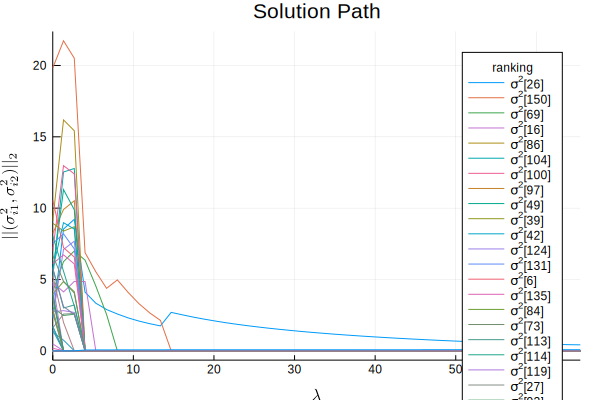

In [57]:
plotsolpath(Σ̂path, Σ̂intpath, λpath)

Since the legend contains too many values, we limit it to 15.

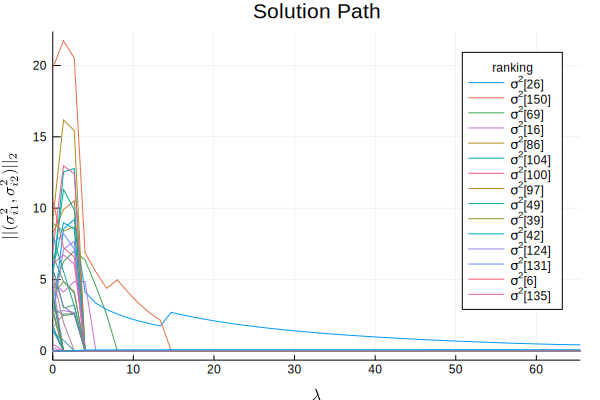

In [60]:
plotsolpath(Σ̂path, Σ̂intpath, λpath; nranks=15)